# ANALISIS SENTIMEN TERHADAP KEBIJAKAN FULL DAY SCHOOL DENGAN METODE SUPPORT VECTOR MACHINE (SVM)
Aplikasi ini menggunakan methode SVM. ada pun library yang harus digunakan antara lainnya :  
1. Install pandas: pip install pandas
2. Install numpy: pip install numpy
3. Install matplotlib: pip install matplotlib
4. Install openpyxl: pip install openpyxl
5. Install string: pip install string
6. Install re: pip install re
7. Install nltk: pip install nltk
8. Install swifter: pip install swifter
9. Install deep_translator: pip install deep-translator


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import string
import re #regex library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
import swifter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from deep_translator import GoogleTranslator
import time
from sklearn.svm import SVC

MENYIAPKAN DATA LATIH : Mengambil data latih yang sudah disiapkan dalam bentuk Excel.

In [10]:
data = pd.read_excel('assets/data_latih.xlsx')
df=pd.DataFrame(data[['tweet']])
df

,tweet
0,ke 24 tayang yang ane baru liat IG soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang
...,...
3994,Gk setuju gw ngerasain sendiri<br>-banyaj PR<b...
3995,Mungkin banget. Gw aja udh cape sekolah masih ...
3996,"Halo Haikal, saya dari masa depan tepatnya tah..."
3997,Saya sampai demam karena lamanya sekolah dan p...


CASE FOLDING: Melakukan case folding dari hasil tweet, dimana case folding mengubah semua huruf menjadi lowercase (huruf Kecil).

In [11]:

df['case folding'] = df['tweet'].str.lower()
df

,tweet,case folding
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang
...,...,...
3994,Gk setuju gw ngerasain sendiri<br>-banyaj PR<b...,gk setuju gw ngerasain sendiri<br>-banyaj pr<b...
3995,Mungkin banget. Gw aja udh cape sekolah masih ...,mungkin banget. gw aja udh cape sekolah masih ...
3996,"Halo Haikal, saya dari masa depan tepatnya tah...","halo haikal, saya dari masa depan tepatnya tah..."
3997,Saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...


CLEANING DATA
1. Menghapus semua tanda baca dan karakter yang bukan huruf.
2. Menghapus angka yang mungkin merupakan kata-kata yang penting.
3. Menghapus whitespace yang ada di awal dan akhir tweet.
4. Menghapus whitespace yang ada di antara kata.
5. Menghapus kata-kata yang kata sendiri.

In [12]:
import re

def remove_tweet_special(text):
    # Mengcheck bahwa data merupakan string
    if not isinstance(text, str):
        return ""  # Jika bukan string, akan kembalikan data kosong
    
    # Menghilangkan tab, line baru, and backslash karakter
    text = text.replace('\t', " ").replace('\n', " ").replace('\\', " ")

    # Menghilangkan non-ASCII characters (emoticons, Chinese characters, etc.)
    text = text.encode('ascii', 'replace').decode('ascii')

    # Menghilangkan mentions, links, and hashtags
    text = re.sub(r'[@#][A-Za-z0-9]+|https?://\S+', " ", text)

    # Menghilangkan extra whitespace
    text = ' '.join(text.split())

    return text

# Fungsi untuk menghapus tag HTML
def remove_html_tags(text):
    # Ganti <br> dengan spasi
    text = text.replace("<br>", " ").replace("<br/>", " ").replace("<p>", " ").replace("</p>", " ")
    # Hapus tag HTML lainnya
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    # Ganti spasi berlebih dengan satu spasi
    clean_text = ' '.join(clean_text.split())
    return clean_text

def remove_number(text):
    return  re.sub(r"\d+", "", text)

#Menghilangkan  punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#Menghilangkan whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#Menghilangkan kelebihan whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['data cleansing'] = df['case folding'].apply(remove_html_tags)

df['data cleansing'] = df['data cleansing'].apply(remove_tweet_special)

df['data cleansing'] = df['data cleansing'].apply(remove_number)

df['data cleansing'] = df['data cleansing'].apply(remove_punctuation)

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_LT)

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_multiple)

df['data cleansing'] = df['data cleansing'].apply(remove_single_char)

df.head()


C:\Users\adiyo\AppData\Local\Temp\ipykernel_18548\2709431794.py:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,tweet,case folding,data cleansing
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang



Tokenization : 
Melakukan tokenisasi kata-kata pada data yang sudah dibersihkan.

In [13]:
# Mengunduh  NLTK data untuk tokenization
nltk.download('punkt')

def tokenization(text):
  return word_tokenize(text)

df['tokenization'] = df['data cleansing'].apply(tokenization)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet,case folding,data cleansing,tokenization
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny..."
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ..."
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka..."
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ..."
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at..."


Tokenization : Melakukan normalisasi kata-kata yang telah di-tokenisasi

In [14]:
normalized_word = pd.read_excel("assets/normalisasi.xlsx")

# Membuat kamus untuk normalisasi
normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    normalized_word_dict[row[0]] = row[1]  

# fungsi tokenisasi
def tokenization(text):
    return word_tokenize(text)

# Fungsi normalisasi
def normalized_term(document):
    return [normalized_word_dict.get(term, term) for term in document]

df['normalized_term'] = df['tokenization'].apply(normalized_term)
df.head()

,tweet,case folding,data cleansing,tokenization,normalized_term
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny...","[ke, tayang, yang, ane, baru, lihat, instagram..."
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, ke, berapa, yg, pentik, like, ..."
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka...","[tidak, lahh, aku, nanti, aku, jadi, malas, se..."
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ...","[kalo, aku, sama, biasa, aja, kan, sekolah, ak..."
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at...","[jadi, capek, harus, bawa, makanan, banyak, at..."


Stopwords : Melakukan stopwords pada data normalisasi yang umum dipakai dalam bahasa Indonesia disebutkan dalam file stopwords.xlsx

In [15]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

# Download the necessary NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

# Menggunakan Indonesian stopwords
list_stopwords = stopwords.words('indonesian')

# Bisa menambahkan stopword yang dibutuhkan ke list stopwords
list_stopwords.extend([
    'full', 'day',
    'nik', 'ais', 'ih', 'kuea', 'ndes', 'tk', 'arg', 'hhhh', 'wuakakak',
    'gtth', 'wowww', 'apeeee', 'Aksjsjsk', 'alaee', 'koq', 'salengpraew',
    'rukkhadevata', 'zeon', 'vivienne', 'yaam', 'woyy', 'ykwi', 'auff',
    'ue', 'hoek', 'hayo', 'chnmn', 'hahahah', 'haaaaaa', 'din', 'woy',
    'ndeer', 'lalalala', 'wkwkwkwkwkkw', 'woyyy', 'dih', 'den', 'hehew',
    'etdah', 'beeeuh', 'wahh', 'heheee', 'hhaaha', 'waaaaa', 'oakilah',
    'haaaahh', 'huft', 'ai', 'et', 'acha', 'hokyahokya', 'hahahihi',
    'yl', 'wihh', 'hahahaa', 'hhhh', 'def', 'ayom', 'ser', 'duh',
    'heuheueheu', 'huwaaaaaa', 'yalah', 'mww', 'cekabia', 'dikatara',
    'angganara', 'krtsk', 'woee', 'ndi', 'ohh', 'www', 'aee', 'huaaaa',
    'gn', 'hahahah', 'nd', 'ema', 'ceratops', 'pasuk', 'ygy', 'repp',
    'gais', 'hadehhh', 'walah', 'hahah', 'paa', 'awkwkwk', 'wkwkk',
    'wkwkw', 'wkwkwkwkwkwah', 'wkwkwkw', 'baceprot', 'sksksk', 'heheh',
    'brooo', 'dbd', 'aeee', 'weeeh', 'wehh', 'milta', 'hsnah', 'swsg',
    'hemm', 'xda', 'yara', 'ohh', 'heh', 'kle', 'acy', 'hayooo',
    'hahahahaha', 'balablablabla', 'lai', 'loj', 'itine', 'heehehe',
    'kwkwk', 'kwkwkwkwwkwk', 'waaa', 'demending', 'pali', 'eeh',
    'dlsb', 'cooooy', 'hehehehe', 'adjem', 'aih', 'syar', 'wkwkk',
    'aowkwkwk', 'walah', 'euy', 'der', 'hahaa', 'hesteg', 'hmmmmtar',
    'gtideologi', 'ab', 'owkwkwkwk', 'dncw', 'sloga', 'jo', 'jengjenggg',
    'anuanu', 'caw', 'ehehheheh', 'hlaa', 'hahahihi', 'ckckckck',
    'sich', 'pakin', 'mmarkpkk', 'ponponpon', 'kyary', 'pamyu',
    'laaahhh', 'cp', 'duhhh', 'napen', 'lise', 'bi', 'ieu', 'poho',
    'boga', 'imah', 'keur', 'ulin', 'kwkwkw', 'ehheh', 'gryli',
    'oalah', 'prekk', 'hehh', 'cere', 'ekekekek', 'chco', 'nganu',
    'wkwkkwkwkwkwkw', 'pfft', 'awowkwkwkwk', 'kinyis', 'pus', 'yng',
    'yg', 'yang', 'wkwoswkwo', 'wkwkwkwkwkwk', 'ahahha', 'weeeeh',
    'hah', 'fir', 'hong', 'jay', 'haikyuu', 'nderrr',
    'omtanteuwaksodara', 'ahsajkakaka', 'kwkwkwk', 'derrr',
    'wwkwkwkw', 'hadehh', 'aaaaa', 'heeh', 'dem', 'ocaaa',
    'wo', 'prenup', 'dihhh', 'cokk', 'imho', 'chenle',
    'jsdieksisnisawikwok', 'hahahahahahaha', 'bam', 'yowohh',
    'lau', 'boiiiii', 'gih', 'beuhhh', 'wkw', 'wkwkwkw',
    'dooong', 'oalaaaa', 'sinoeng', 'wkekwk', 'nyai',
    'cai', 'anw', 'tjuyyy', 'hanss', 'mh', 'ih',
    'widihh', 'cy', 'eeeee', 'gi', 'luat', 'laaaaa',
    'cam', 'lancau', 'tuch', 'kun', 'uhhhh', 'chuakssss',
    'oiyaa', 'hadeuhhhh', 'wkwkwkwwk', 'hehehee', 'nk',
    'lak', 'qwq', 'oneesan', 'eeehmmm', 'am', 'wkwk'
])

# Mengisi data manual stopwords ke excel
txt_stopword = pd.read_csv("assets/stopwordbahasa.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"])

# Mengconvert data stopword
list_stopwords = set(list_stopwords)

# Fungsi untuk menghilangkan stopwords
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['stopwords'] = df['normalized_term'].apply(stopwords_removal)
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,case folding,data cleansing,tokenization,normalized_term,stopwords
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny...","[ke, tayang, yang, ane, baru, lihat, instagram...","[tayang, ane, lihat, instagram, soalny]"
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, pentik, like, koment, subscribe]"
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka...","[tidak, lahh, aku, nanti, aku, jadi, malas, se...","[lahh, malas, aja]"
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ...","[kalo, aku, sama, biasa, aja, kan, sekolah, ak...","[kalo, aja, sekolah, sekolah]"
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at...","[jadi, capek, harus, bawa, makanan, banyak, at...","[capek, bawa, makanan, uang]"


Stemming : Melakukan stemming pada data stopwords yang umum dipakai dalam bahasa Indonesia menggunakan library Sastrawi

In [16]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    if term == 'setuju':
        return 'setuju'
    else:
        return stemmer.stem(term)

# Membuat ketentuan dari stemming
term_dict = {}
for document in df['normalized_term']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = stemmed_wrapper(term)

# Menggunakan stemming
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed'] = df['stopwords'].swifter.apply(get_stemmed_term)


def fit_stopwords(text):
    text= np.array(text)
    text= ' '.join(text)
    return text

df['text']=df['stemmed'].apply(lambda x: fit_stopwords(x))
df.to_excel("output/bahasa.xlsx", index=False)
df

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import nltk
import pandas as pd
from deep_translator import GoogleTranslator

# Download VADER lexicon jika belum pernah dilakukan
nltk.download('vader_lexicon')
df = pd.read_excel('output/bahasa.xlsx')

# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Inisialisasi Google Translator
translator = Translator()
sentiment_data = []
sentiment_positif = []
sentiment_negatif = []
sentiment_netral = []

# Loop untuk menerjemahkan dan melakukan sentiment analysis
for index, row in df.iterrows():
    try:
        # Terjemahkan teks ke bahasa Inggris
        translated = GoogleTranslator(source='id', target='en').translate(row['text'])
        
        # Hitung sentimen menggunakan VADER
        vader = sia.polarity_scores(translated)
        sentiment = vader['compound']
       
        # Tentukan label sentimen
        if sentiment > 0:
            label = 'positif'
            df.at[index, 'Label'] = label
            sentiment_positif.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        elif sentiment < 0:
            label = 'negatif'
            df.at[index, 'Label'] = label
            sentiment_negatif.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        else:
            label = 'netral'
            df.at[index, 'Label'] = label
            sentiment_netral.append({
                'Text': row['text'],
                'Translated': translated,
                'Sentimen': sentiment,
                'Label': label
            })
        
        sentiment_data.append({
            'Text': row['text'],
            'Translated': translated,
            'Sentimen': sentiment,
            'Label': label
        })
    except Exception as e:
        df.at[index, 'Sentimen'] = 0
        df.at[index, 'Label'] = 'netral'
        sentiment_netral.append({
            'Text': row['text'],
            'Translated': translated,
            'Sentimen': 0,
            'Label': 'netral'
        })
        sentiment_data.append({
            'Text': row['text'],
            'Translated': translated,
            'Sentimen': 0,
            'Label': 'netral'
        })
        print('Error processing data at index', index, ':', e)
        
# Convert lists to DataFrames
df_sentiment_positif = pd.DataFrame(sentiment_positif)
df_sentiment_negatif = pd.DataFrame(sentiment_negatif)
df_sentiment_netral = pd.DataFrame(sentiment_netral)
data = pd.DataFrame(sentiment_data)

# Print the DataFrame to check results

# Menyimpan hasil ke Excel
df_sentiment_positif.to_excel("output/lexicon/lexicon_positif.xlsx", index=False)
df_sentiment_negatif.to_excel("output/lexicon/lexicon_negatif.xlsx", index=False)
df_sentiment_netral.to_excel("output/lexicon/lexicon_netral.xlsx", index=False)
data.to_excel("output/lexicon/sentiment_analysis.xlsx", index=False)

data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Calculating Sentiment Analysis : Melakukan analisis sentiment pada data yang sudah di latih

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada data pelatihan
tfidf_train = tfidf_vectorizer.fit_transform(data['Text'])

# Melakukan pembobotan TF-IDF pada data uji dengan menggunakan vocabulary yang sama dengan data pelatihan
tfidf_test = tfidf_vectorizer.transform(data['Text'])

# Tampilkan hasil pembobotan
print("Matriks TF-IDF untuk data pelatihan:")
print(tfidf_train)

print("\nMatriks TF-IDF untuk data uji:")
print(tfidf_test)


Matriks TF-IDF untuk data pelatihan:
  (0, 15)	0.4472135954999579
  (0, 5)	0.4472135954999579
  (0, 9)	0.4472135954999579
  (0, 2)	0.4472135954999579
  (0, 18)	0.4472135954999579
  (1, 16)	0.3333333333333333
  (1, 7)	0.3333333333333333
  (1, 13)	0.3333333333333333
  (1, 10)	0.6666666666666666
  (1, 0)	0.3333333333333333
  (1, 17)	0.3333333333333333
  (2, 1)	0.49552379079705033
  (2, 12)	0.6141889663426562
  (2, 8)	0.6141889663426562
  (3, 14)	0.8413381201263408
  (3, 6)	0.4206690600631704
  (3, 1)	0.3393931489111758
  (4, 19)	0.5
  (4, 11)	0.5
  (4, 3)	0.5
  (4, 4)	0.5

Matriks TF-IDF untuk data uji:
  (0, 18)	0.4472135954999579
  (0, 15)	0.4472135954999579
  (0, 9)	0.4472135954999579
  (0, 5)	0.4472135954999579
  (0, 2)	0.4472135954999579
  (1, 17)	0.3333333333333333
  (1, 16)	0.3333333333333333
  (1, 13)	0.3333333333333333
  (1, 10)	0.6666666666666666
  (1, 7)	0.3333333333333333
  (1, 0)	0.3333333333333333
  (2, 12)	0.6141889663426562
  (2, 8)	0.6141889663426562
  (2, 1)	0.4955237907

In [ ]:

data = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')
# inisialisasi TF-IDF
vectorizer = TfidfVectorizer()

# ubah teks menjadi vektor
X = vectorizer.fit_transform(data['Translated'])

# MODEL TRAINING, SVM -------
# pada tahap ini kita akan melakukan training menggunakan algoritma SVM
# SVM digunakan jika kita memiliki data yang tidak terlalu besar, di samping itu SVM tidak membutuhkan
# sumber daya komputasi yang besar dibandingkan ANN, sehingga cocok untuk data yang tidak terlalu besar

# inisialisasi model SVM
svm = SVC()

# latih model SVM
svm.fit(X, data['Label'])

# MODEL EVALUATION -------
# pada tahap ini kita akan melakukan evaluasi model yang sudah kita latih

# prediksi label menggunakan SVM
y_pred_svm = svm.predict(X)

# hitung akurasi
accuracy_svm = np.mean(y_pred_svm == data['Label'])

# tampilkan hasil akurasi
print('Akurasi SVM:', accuracy_svm)
# print(data[['Sentimen', 'Label']])

# SAVE MODEL -------
# setelah model berhasil dilatih, kita perlu menyimpan model ke dalam file
# file yang kita simpan di sini adalah model dan vectorizer yang sudah kita latih
# model digunakan untuk melakukan prediksi atau analisis sentimen, sedangkan vectorizer digunakan untuk
# mengubah teks menjadi vektor numerik yang dapat digunakan oleh algoritma SVM


Akurasi SVM: 1.0


In [ ]:

# Calculating the number of each sentiment
jumlah_negatif = sum(data['Label'] == 'negatif')
jumlah_positif = sum(data['Label'] == 'positif')
jumlah_netral = sum(data['Label'] == 'netral')
total_data = len(df)

print("Negatif:", jumlah_negatif, ", Positif:", jumlah_positif, ", Netral:", jumlah_netral, ", Total:", total_data)

# Calculate the number of training and testing data
jumlah_data_training = int(0.8 * total_data)
jumlah_data_testing = total_data - jumlah_data_training

# Calculate the percentage of training and testing data
persentase_training = (jumlah_data_training / total_data) * 100
persentase_testing = (jumlah_data_testing / total_data) * 100

# Calculating the number of positive sentiment data used for training and testing
jumlah_positif_training = len(data[(data['Label'] == 'positif') & (data.index < jumlah_data_training)])
jumlah_positif_testing = len(data[(data['Label'] == 'positif') & (data.index >= jumlah_data_training)])

# Calculating the number of positive sentiment data used for training and testing
jumlah_netral_training = len(data[(data['Label'] == 'netral') & (data.index < jumlah_data_training)])
jumlah_netral_testing = len(data[(data['Label'] == 'netral') & (data.index >= jumlah_data_training)])

# Calculating the number of negative sentiment data used for training and testing
jumlah_negatif_training = len(data[(data['Label'] == 'negatif') & (data.index < jumlah_data_training)])
jumlah_negatif_testing = len(data[(data['Label'] == 'negatif') & (data.index >= jumlah_data_training)])

len_data = 10  # Adjust this based on your data length

print("\nPembagian Dataset")
print("-" * 100)
print("{:<{len_data}} | {:<8}| {:<{len_data}}| {:<{len_data}}".format(
    "Sentiment ", "Jumlah", f"Data Training ({persentase_training:.2f}%)",
    f"Data Testing ({persentase_testing:.2f}%)", len_data=len_data))
print("-" * 100)
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Negatif", jumlah_negatif, jumlah_negatif_training, jumlah_negatif_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_netral_training, jumlah_netral_testing, len_data=len_data + 1))

print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Positif", jumlah_positif, jumlah_positif_training, jumlah_positif_testing, len_data=len_data + 1))
print("-" * 100)
# print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_data_training, jumlah_data_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Total", jumlah_negatif + jumlah_positif+ jumlah_netral, jumlah_negatif_training + jumlah_positif_training+ jumlah_netral_training, jumlah_negatif_testing + jumlah_positif_testing+ jumlah_netral_testing, len_data=len_data + 1))

Negatif: 3 , Positif: 1 , Netral: 1 , Total: 3999

Pembagian Dataset
----------------------------------------------------------------------------------------------------
Sentiment  | Jumlah  | Data Training (79.99%)| Data Testing (20.01%)
----------------------------------------------------------------------------------------------------
Negatif    | 3       | 3          | 0          
Netral     | 1       | 1          | 0          
Positif    | 1       | 1          | 0          
----------------------------------------------------------------------------------------------------
Total      | 5       | 5          | 0          


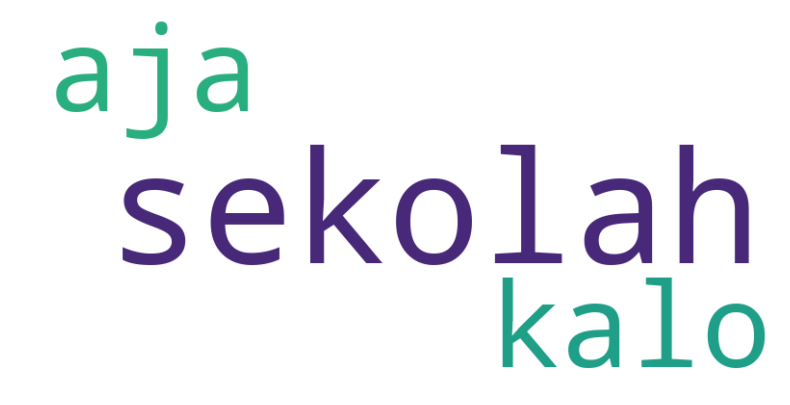

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Load the data
data = pd.read_excel('output/lexicon/sentiment_analysis.xlsx')
# Filter for neutral sentiment
neutral_data = data[data['Label'] == 'netral']

# Combine all the text from the neutral sentiment rows
combined_text = ' '.join(neutral_data['Text'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


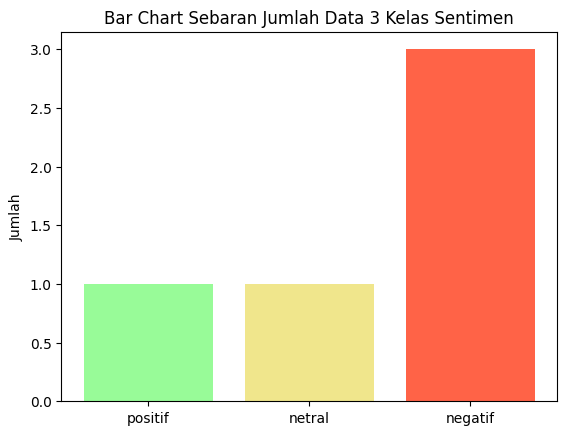

In [ ]:
x_axis = ['positif', 'netral', 'negatif']
y_axis = [(sum(df['Label']=='positif')), (sum(df['Label']=='netral')), (sum(df['Label']=='negatif'))]
c = ['palegreen','khaki','tomato']
plt.bar(x_axis, y_axis, color = c)
plt.title('Bar Chart Sebaran Jumlah Data 3 Kelas Sentimen')
plt.ylabel('Jumlah')
plt.show()

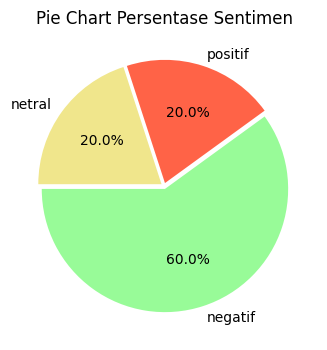

In [ ]:
#Membuat PieChart
plt.figure(figsize=(8,4))
plt.title("Pie Chart Persentase Sentimen", fontsize=12)
chart = plt.pie(data.Label.value_counts(),explode=(0.025,0.025,0.025), 
            labels=data.Label.value_counts().index, 
            colors=['palegreen','tomato','khaki'],  
            autopct='%1.1f%%', startangle=180)
plt.show()

data.to_excel("output/labeled.xlsx")

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
import pandas as pd

# Load data
data = pd.read_excel('output/labeled.xlsx')
df = pd.DataFrame(data)

# Split into features and labels
y = df.Label.values
x = df.Translated.values

# Ensure there are more than one unique class
unique_labels = df['Label'].unique()
print("Unique Labels:", unique_labels)

class_counts = df['Label'].value_counts()
print("Class Counts:")
print(class_counts)

if len(unique_labels) < 2:
    raise ValueError("There should be more than one unique class for SVM training.")

# Handle imbalanced classes (if necessary)
# Separate majority and minority classes
df_majority = df[df['Label'] == class_counts.idxmax()]
df_minority = df[df['Label'] == class_counts.idxmin()]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Split the balanced data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_balanced['Translated'], df_balanced['Label'], 
                                                    test_size=0.2, random_state=1, shuffle=True)

# Vectorize the text data
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1), binary=True, stop_words='english')
vectorizer.fit(list(x_train) + list(x_test))

x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)
print(x_train_vec.shape)
print(x_test_vec.shape)

# Linear SVM Classifier
linear = svm.SVC(kernel='linear', C=1)
linear.fit(x_train_vec, y_train)
linear_pred = linear.predict(x_test_vec)
score_linear = accuracy_score(linear_pred, y_test)
print("Accuracy with Linear SVM: ", score_linear * 100, '%')

# RBF SVM Classifier
rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
rbf.fit(x_train_vec, y_train)
rbf_pred = rbf.predict(x_test_vec)
score_rbf = accuracy_score(rbf_pred, y_test)
print("Accuracy with RBF SVM: ", score_rbf * 100, '%')

# Polynomial SVM Classifier
poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(x_train_vec, y_train)
poly_pred = poly.predict(x_test_vec)
score_poly = accuracy_score(poly_pred, y_test)
print("Accuracy with Polynomial SVM: ", score_poly * 100, '%')


Unique Labels: ['negatif' 'positif' 'netral']
Class Counts:
Label
negatif    3
positif    1
netral     1
Name: count, dtype: int64
(4, 14)
(2, 14)
Accuracy with Linear SVM:  100.0 %
Accuracy with RBF SVM:  50.0 %
Accuracy with Polynomial SVM:  100.0 %


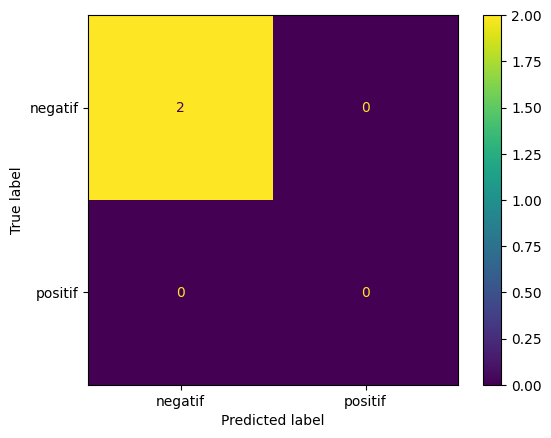

In [ ]:
cm = confusion_matrix(y_test, linear_pred, labels=linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=linear.classes_)
disp.plot()
plt.show()

In [ ]:
print("Linear SVM Confusion Matrix: ")
print(confusion_matrix(y_test, linear_pred))

Linear SVM Confusion Matrix: 
[[2]]


C:\Users\adiyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

